**FACE DETECTION - AI PROJECT**

*OVERVIEW*


---

The primary objective of this project was to implement face detection in both images and videos using the Haar Cascade classifier, a pre-trained model available in the OpenCV library. The goal was to accurately identify and mark human faces in various frames, providing a foundation for more advanced computer vision applications.


---



Install OpenCV (if not pre-installed)

In [ ]:
!pip install opencv-python

Import necessary libraries

In [35]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import IPython.display as display
import matplotlib.pyplot as plt
from IPython.display import HTML
import os

Upload an image file

In [36]:
uploaded = files.upload()

Saving erwin_kreyszig.jpg to erwin_kreyszig (1).jpg


Load the uploaded image

In [37]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

Load the pre-trained Haar Cascade classifier

In [38]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Convert image to grayscale

In [39]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Perform face detection on the image

In [40]:
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

Draw bounding boxes around detected faces

In [41]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 182, 193), 2)

Display the output image

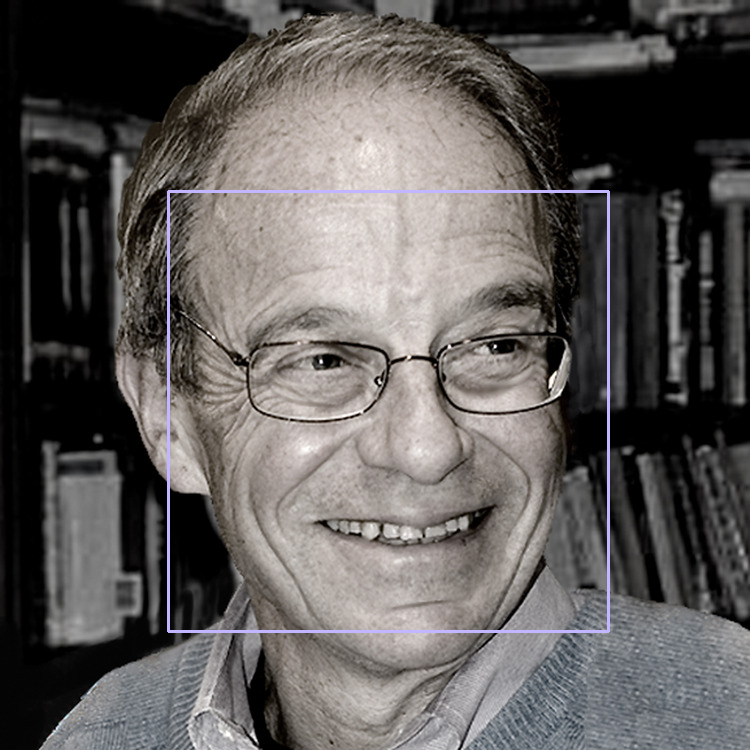

In [42]:
cv2_imshow(image)

Save and download the output image

In [43]:
cv2.imwrite('output_image.jpg', image)
files.download('output_image.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



Upload a video file

In [44]:
print("Please upload a video file for face detection:")
uploaded_video = files.upload()

Please upload a video file for face detection:


Saving WhatsApp Video 2024-09-01 at 10.54.50 AM.mp4 to WhatsApp Video 2024-09-01 at 10.54.50 AM.mp4


Load the uploaded video

In [45]:
video_path = list(uploaded_video.keys())[0]

Load the pre-trained Haar Cascade classifier

In [46]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Function to apply non-maximum suppression

In [47]:
def non_max_suppression(boxes, overlap_thresh=0.3):
    if len(boxes) == 0:
        return []

    # If the bounding boxes are integers, convert them to float for more precision
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 0] + boxes[:, 2]
    y2 = boxes[:, 1] + boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))

    return boxes[pick].astype("int")

Process video and save with face detection

In [48]:
def face_detect_in_video(video_source, output_file):
    # Open video source
    cap = cv2.VideoCapture(video_source)

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=8, minSize=(30, 30))

        # Apply non-maximum suppression to reduce multiple rectangles
        faces = non_max_suppression(np.array(faces))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (221, 160, 221), 2)

        out.write(frame)

    # Release video capture and writer
    cap.release()
    out.release()

Process the video and save the output

In [49]:
output_file = 'processed_video.mp4'
face_detect_in_video(video_path, output_file)

Download the Output Video

In [50]:
print("Processed video with face detection overlay:")
files.download(output_file)

Processed video with face detection overlay:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CONCLUSION**


---

The implemented face detection system successfully detects faces in both static images and dynamic video streams. By leveraging the Haar Cascade classifier and optimizing parameters, accurate and efficient detection was achieved. The use of visually distinct bounding boxes enhances user experience, while NMS ensures clarity by eliminating redundant detections. Although the system demonstrates effective performance, adopting advanced techniques and models in future work could further improve accuracy, robustness, and applicability, paving the way for more sophisticated computer vision applications.



---

